Dana Rozenblum & Nitzan Tal

**What can you do with random variables**:
* calculate their cdf, quantiles, moments, etc from data - or from formulas
* visualize data samples and populations
* sample data from distribution formulas
* fit distribution formulas to data samples

That's what we'll try here. We'l use the libraries `matplotlib`, `numpy`, `scipy` and `pandas`, which must be installed beforehand - e.g. using `pip` or `conda` package managers from command line.

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

## A demo: calculating distribution properties

#### This is how distribution properties can be calculated from data

In [ ]:
data = [1, 2, 3, 4, 9, 10, 11, 17, 30, 49, 121, 289, 503]

In [ ]:
# moments
print(np.mean(data))
print(np.std(data))
print(scipy.stats.skew(data))
print(scipy.stats.kurtosis(data))

80.6923076923077
144.2345230280743
2.0771804369778044
3.0325590245663427


In [ ]:
# linearly interpolated quantiles: min, 25% quantlie, median, 75% quantile, max
print(np.percentile(data, [0, 25, 50, 75, 100]))

[  1.   4.  11.  49. 503.]


#### And here these properties are calculated from population formulas

Scipy has a special family of objects that represent distributions and have lots of interesting methods. 

See more details in https://docs.scipy.org/doc/scipy/reference/stats.html

In [ ]:
# formula for a normal with mean 90 and standard deviation 100
distribution = scipy.stats.norm(loc=90, scale=100)
print(type(distribution))

<class 'scipy.stats._distn_infrastructure.rv_frozen'>


In [ ]:
# analytical moments (someone took the integrals for you)
print(distribution.mean())
print(distribution.std())
print(distribution.stats('mvsk')) # mean, variance, skewness and kurtosis

90.0
100.0
(array(90.), array(10000.), array(0.), array(0.))


In [ ]:
# cdf at different points
print(distribution.cdf([10, 100, 200]))
# cdf at different points
print(distribution.pdf([10, 100, 200]))

[0.2118554  0.53982784 0.86433394]
[0.00289692 0.00396953 0.00217852]


In [ ]:
# quantiles at different percentages
print(distribution.ppf([0.05, 0.5, 0.8, 0.95, 0.999]))

[-74.4853627   90.         174.16212336 254.4853627  399.02323062]


## Visualization

The most frequently used plot for distributions is histogram

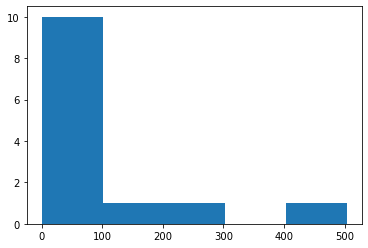

In [ ]:
plt.hist(data, bins=5);

Sometimes a histogram with unequal bins can be more informative - but don't forget to normalize it!

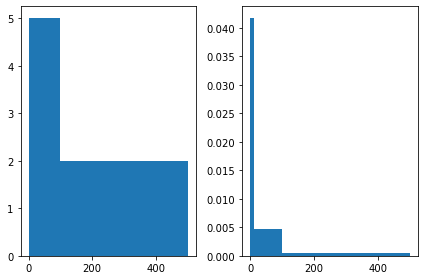

In [ ]:
bins = [0, 10, 100, 500]
plt.subplot(1,2,1)
plt.hist(data, bins=bins);
plt.subplot(1,2,2)
plt.hist(data, bins=bins, density=True)
plt.tight_layout()

To visualize (something like) the CDF of a dataset, you can plot the variable again its cumulative probability in a dataset.

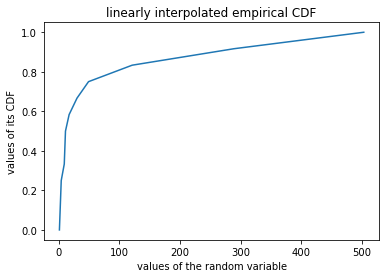

In [ ]:
plt.plot(sorted(data), np.linspace(0, 1, num=len(data)))
plt.xlabel('values of the random variable')
plt.ylabel('values of its CDF')
plt.title('linearly interpolated empirical CDF');

You can plot a kernel (smooted) density estimate

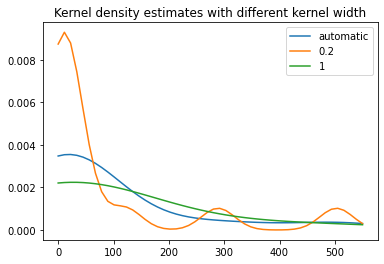

In [ ]:
grid = np.linspace(0, 550)
bandwidths = [None, 0.2, 1]
for bw in bandwidths:
    kde = scipy.stats.kde.gaussian_kde(data, bw_method=bw)
    plt.plot(grid, kde.evaluate(grid));
bandwidths[0] = 'automatic'
plt.legend(bandwidths)
plt.title('Kernel density estimates with different kernel width');

And one more example of looking at log scale for PDF and CDF

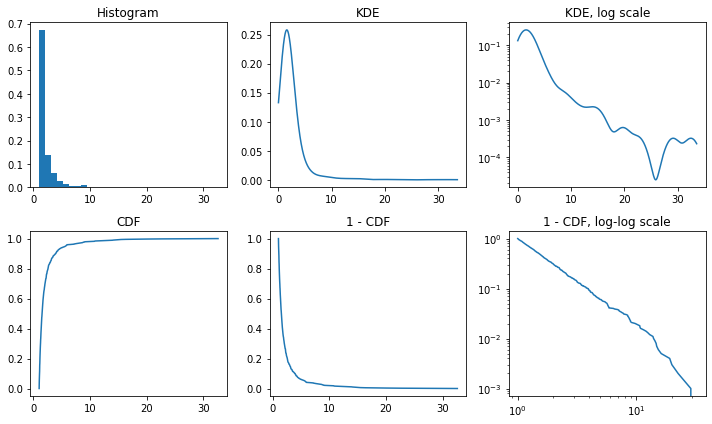

In [ ]:
np.random.seed(1)
pareto_x = scipy.stats.pareto.rvs(1.7, size=1000)
grid = np.linspace(0, pareto_x.max() + 1, 1000)
density = scipy.stats.kde.gaussian_kde(pareto_x, bw_method=0.5).evaluate(grid)

plt.figure(figsize=(10, 6))
plt.subplot(2,3,1)
plt.hist(pareto_x, bins=30, density=True)
plt.title('Histogram')

plt.subplot(2,3,2)
plt.plot(grid, density)
plt.title('KDE')

plt.subplot(2,3,3)
plt.plot(grid, density)
plt.yscale('log')
plt.title('KDE, log scale')

xs = np.array(sorted(pareto_x))
q = np.linspace(0, 1, num=len(pareto_x))

plt.subplot(2,3,4)
plt.plot(xs, q)
plt.title('CDF')

plt.subplot(2,3,5)
plt.plot(xs, 1-q)
plt.title('1 - CDF')

plt.subplot(2,3,6)
plt.plot(xs, 1-q)
plt.yscale('log')
plt.xscale('log')
plt.title('1 - CDF, log-log scale')

plt.tight_layout();

Probability plot, a.k.a. quantile-quantlie plot, is a great way to see how well some distribution family fits to a dataset.

If the fit is good, then most dots will lie close to the diagonal.

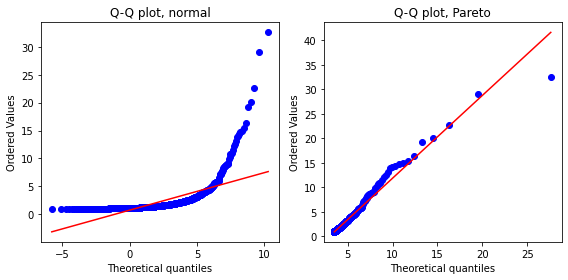

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
scipy.stats.probplot(pareto_x, dist=scipy.stats.norm, sparams=(pareto_x.mean(), pareto_x.std()), plot=plt)
plt.title('Q-Q plot, normal')
plt.subplot(1,2,2)
scipy.stats.probplot(pareto_x, dist=scipy.stats.pareto, sparams=(pareto_x.mean(), pareto_x.std()), plot=plt)
plt.title('Q-Q plot, Pareto');
plt.tight_layout()

## The data: distribution of word frequencies

Let's calculate frequencies of all words from short text messages from https://archive.ics.uci.edu/ml/datasets/sms+spam+collection. 

In [ ]:
import zipfile
import urllib.request
from io import BytesIO
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'

zf = zipfile.ZipFile(BytesIO(urllib.request.urlopen(url).read()))
zf.namelist()

['SMSSpamCollection', 'readme']

In [ ]:
import re
import pandas as pd 
from collections import Counter
data = pd.read_csv(zf.open('SMSSpamCollection'), sep='\t', header=None)
data.columns = ['target', 'text']
words_frequencies = pd.Series(Counter(word for sent in data.text for word in re.split('\W+', sent.lower()) if word))
words_frequencies.head()

go        283
until      27
jurong      1
point      13
crazy      15
dtype: int64

#### Assignment 1: plotting
Your need to visualize the distribution of words frequencies (e.g. plot a histogram of them, or plot their CDF, in an appropriate scale). 

After plotting, you should try to guess from what family of probability distributions this data might have been generated?

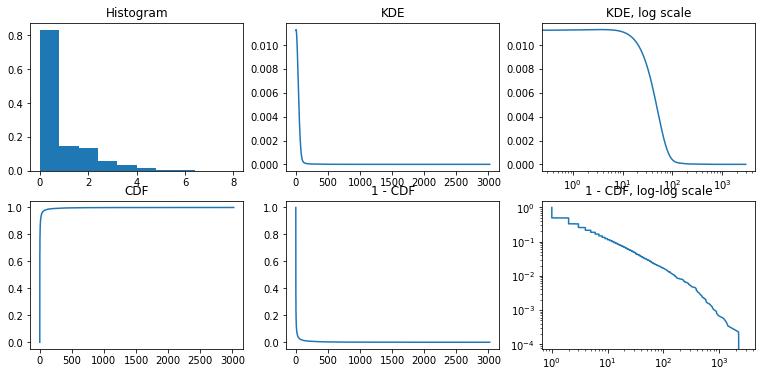

<Figure size 576x288 with 0 Axes>

In [ ]:
# write your code here
np.random.seed(1)
 
 
grid = np.linspace(0, words_frequencies.max() + 1, 5000)
density = scipy.stats.kde.gaussian_kde(words_frequencies, bw_method=0.5).evaluate(grid)

plt.figure(figsize=(13, 6))
plt.subplot(2,3,1)
plt.hist( np.log(words_frequencies),  density=True)
plt.title('Histogram')

plt.subplot(2,3,2)
plt.plot(grid, density)
plt.title('KDE')

plt.subplot(2,3,3)
plt.plot(grid, density)
plt.xscale('log')
plt.title('KDE, log scale')

xs = np.array(sorted(words_frequencies))
q = np.linspace(0, 1, num=len(words_frequencies))

plt.subplot(2,3,4)
plt.plot(xs, q)
plt.title('CDF')

plt.subplot(2,3,5)
plt.plot(xs, 1-q)
plt.title('1 - CDF')

plt.subplot(2,3,6)
plt.plot(xs, 1-q)
plt.yscale('log')
plt.xscale('log')
plt.title('1 - CDF, log-log scale')
plt.figure(figsize=(8, 4))
plt.tight_layout();
#print(xs)


From the above plots it seems that word frequencies distribution is the Pareto distribution because of the following:
1. The shape of the pdf (seen by histograms upper line) - very few very "popular"  values (like bilionairs, superstars) and after that a sharp fall to a  fat tail of a lot of equally un-popular values (like all the common people).
2. 1-CDF in log-log scale is linear as expected from Pareto.
3. Shape might resemble a bit also Exponential distribution so for verfication we also plotted a Q-Q plot which is based on parametres estimation - The plot shows clearly supports the Pareto as the plot shows linear relation - most sample values are aligned with the theoretical values (in contrast to the expoenential distribution)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(1.8637717028254532, -2.135596215306978, 3.135596214214014)
(1.0, 9.325945390151947)


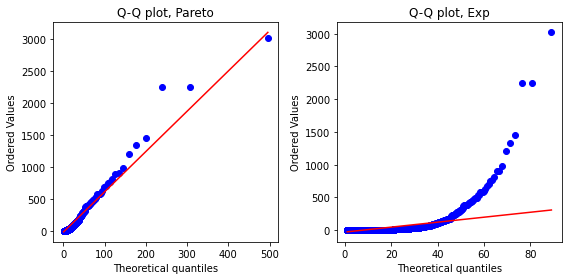

In [ ]:
plt.figure(figsize=(8, 4))
param_paret = scipy.stats.pareto.fit(words_frequencies)
print(param_paret)

plt.subplot(1,2,1)
scipy.stats.probplot(words_frequencies, dist=scipy.stats.pareto, sparams=param_paret, plot=plt)
plt.title('Q-Q plot, Pareto');
param_exp = scipy.stats.expon.fit(words_frequencies)
print(param_exp)

plt.subplot(1,2,2)
scipy.stats.probplot(words_frequencies, dist=scipy.stats.expon, sparams=param_exp, plot=plt)
plt.title('Q-Q plot, Exp');
plt.tight_layout()

#### Assignment 2: method of moments
Let's assume that the data has Pareto distribution with minimal value of 1: $P(X\leq x) = 1 - x^{-b}$.  

Calculate a pointwise estimate of $b$ using method of moments (i.e. solving the equation $sample\_mean = model\_mean$).

In [ ]:
# E(x) = a*b/b-1 = x_bar>> b=(b-1)*x_bar >> b= -x_bar /(1-x_bar)
x_bar = words_frequencies.mean()
estimate_of_b = -x_bar /(1-x_bar)
print(estimate_of_b)


1.1072277349013844


Write your calculations and resulting estimate here

In [ ]:
# a sanity check
print(words_frequencies.mean())
print(scipy.stats.pareto(estimate_of_b).mean())

10.325945390151947
10.325945390151942


#### Assignment 3: maximum likelihood
Let's again assume that the data has Pareto distribution with minimal value of 1: $P(X\leq x) = 1 - x^{-b}$.  

Write a function that takes a single argument, b, and estimates negative Pareto log-likelihood of the dataset of word counts with this parameter (use natural logarithm). 

Then optimize it using `scipy.mimimize`

In [ ]:
def minus_log_likelihood(b):
    data = np.array(words_frequencies.values)
    
    n= data.size
    # only positive b is allowed - otherwise, we return infinitely large loss
    if b <= 0:
        return np.infty
    result = n*np.log(b) -(b+1)* np.sum(np.log(data))
    
    return -result #a scalar: minus log likelihood of the data

# this is a test that your implementation is correct
assert int(minus_log_likelihood(2)) == 16232

In [ ]:
from scipy.optimize import minimize_scalar
result = minimize_scalar(minus_log_likelihood)
print(result)
print(result.x)

     fun: 14755.675049530364
    nfev: 15
     nit: 11
 success: True
       x: 1.177549984924407
1.177549984924407


#### Assignment 4: bootstrapping

Estimate a 95% confidence interval for the population mean using bootstrapping:
1. Create 1000 samples with replacement from the original sample of the same size, and estimate the mean for each
2. Save the errors of these resampled means relative to the mean of the original sample
3. Calculate a 95% confidence interval for these errors
4. Because `true parameter` = `sample estimate` - `error of sample estimate`, one can create a confidence interval for the true parameter (population mean) by subtracting from confidence bounds for errors from  the sample estimate.

[ 8.17852622 11.95357192]


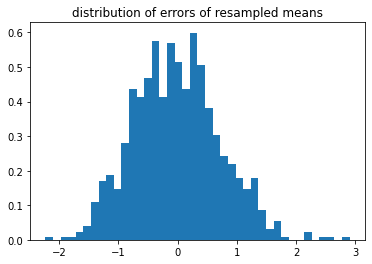

In [ ]:
means = []

for i in range(1000):
    sample =  np.random.choice(words_frequencies, words_frequencies.size, replace=True)
   
    means.append(np.mean(sample))
    
errors_of_sample_means = np.array(means) - words_frequencies.mean()

plt.hist(errors_of_sample_means, density=True, bins=40)
plt.title('distribution of errors of resampled means')

ci_95_for_errors = np.percentile(errors_of_sample_means, [2.5, 97.5])
ci_95_for_population_mean = words_frequencies.mean() - ci_95_for_errors[::-1]
print(ci_95_for_population_mean)